In [3]:
## Importing all the required mpdules 

import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# !pip install missingno

In [4]:
## Read the dataset
rain = pd.read_csv('weatherAUS.csv')
rain.head()
## Dimension of the dataset
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 145460 and the number of columns are 23


# 1. EDA

## 1.1 Descriptive Stats

In [5]:
#Describing the attributes
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Find Categorical variables 
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)



['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
## Unique Values
print(rain.nunique())

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [8]:
# check for cardinality in categorical variables
categorical= rain.select_dtypes(include=['object'])
categorical.head()
for var in categorical:
    
    print(var, ' contains ', len(rain[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


## 1.2 Missing value treatment 

In [9]:
## Checking Nulls 
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

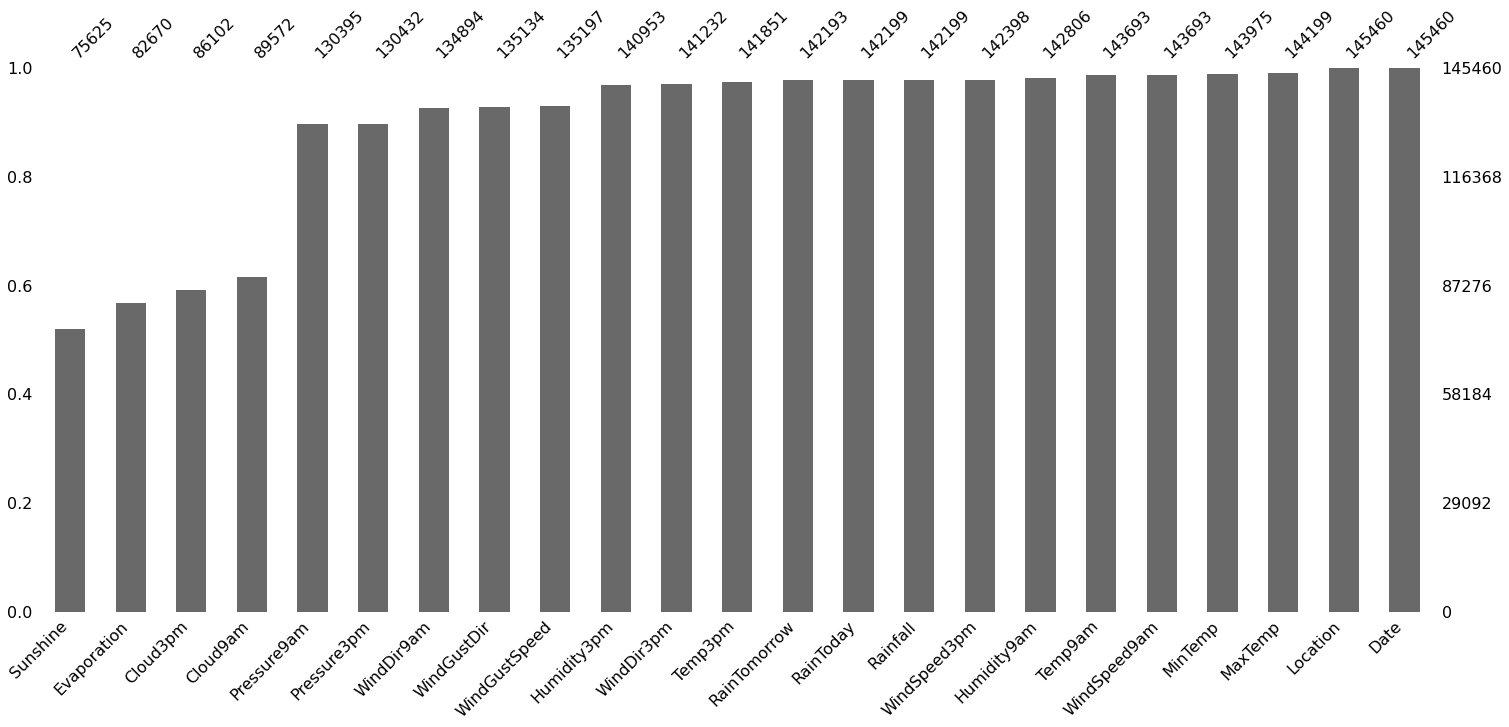

In [10]:
## Finding the missing values
#print(rain.isna().mean(axis=0))
msno.bar(rain, sort='ascending')

In [11]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [12]:
## changing to categories 1,0
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

In [13]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())


In [14]:
#Filling the missing values for categorical variables with mode

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])


In [15]:
# Checking missing values again
(rain.isnull().sum()/len(rain))*100


Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

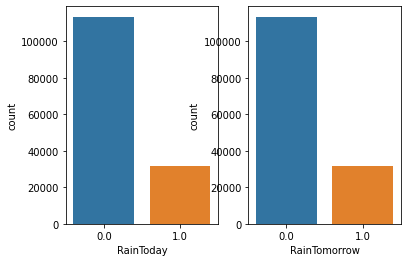

<Figure size 1440x1440 with 0 Axes>

In [16]:
## Count of rain today and tomorrow
fig, ax =plt.subplots(1,2)
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='RainToday',ax=ax[0])
sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

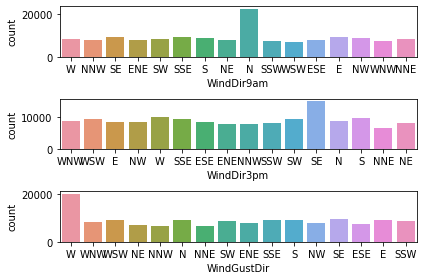

<Figure size 720x720 with 0 Axes>

In [17]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=rain,x='WindDir9am',ax=ax[0])
sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])
sns.countplot(data=rain,x='WindGustDir',ax=ax[2])
fig.tight_layout()

## Notes - 
#1. At 9 am, it is highest for direction N.
#2. At 3 pm, it is highest for direction SE.

In [18]:
#Dropping date column
rain=rain.iloc[:,1:]

## 1.3 Treating the categorical variables 

In [19]:
# Encoding 
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])


Text(0, 0.5, 'WindSpeed3pm')

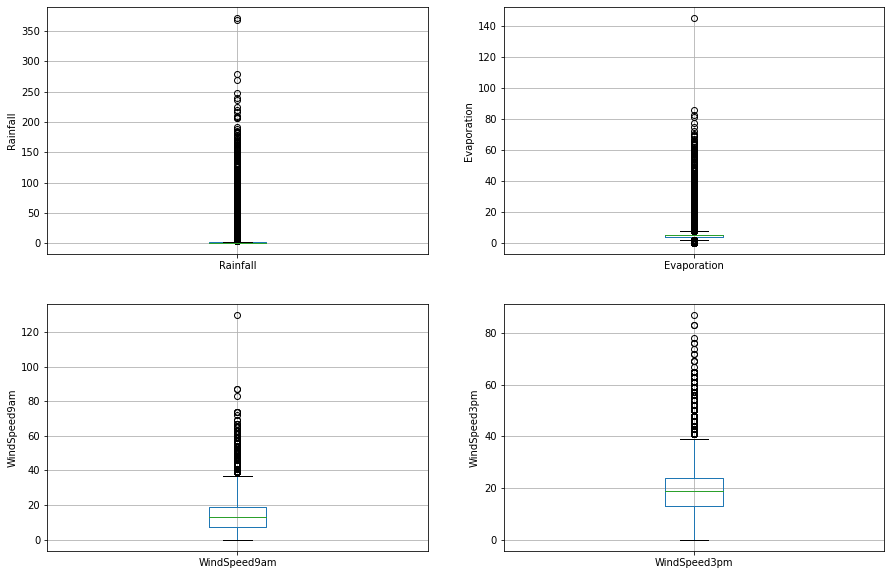

In [20]:
## Boxplots to visualise outliers 
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = rain.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = rain.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = rain.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = rain.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

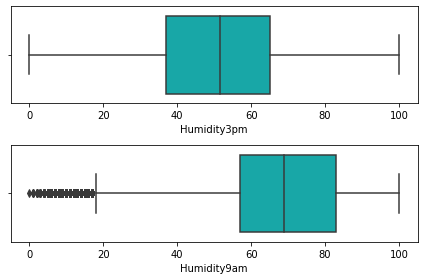

<Figure size 720x720 with 0 Axes>

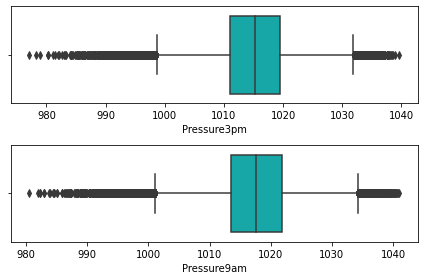

<Figure size 720x720 with 0 Axes>

In [21]:
# Checking for outliers
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

In [22]:
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)


## 1.4 Checking relation between two variables


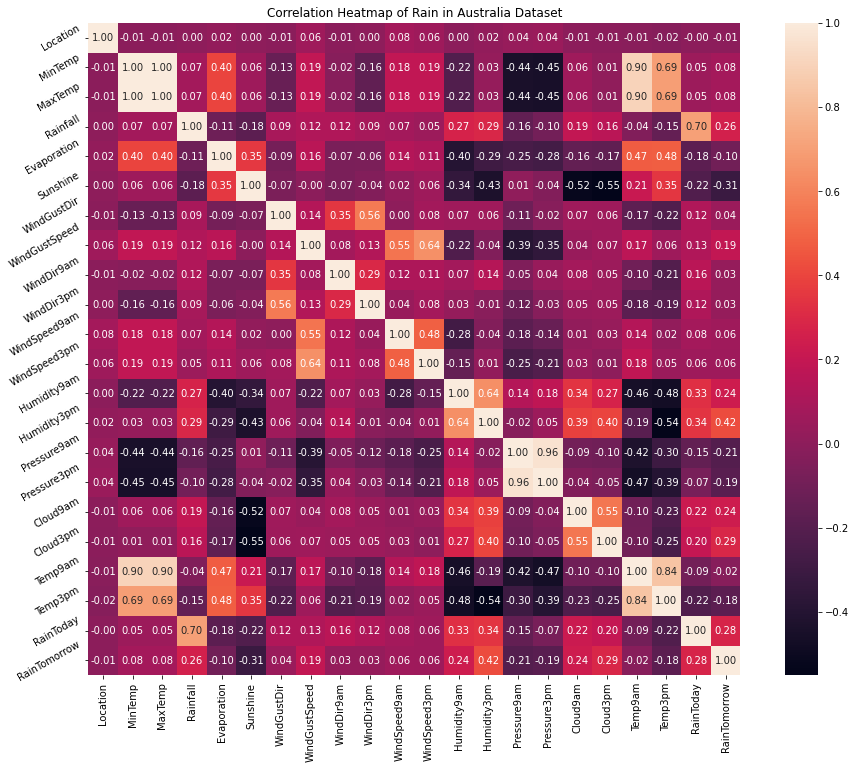

In [23]:
correlation = rain.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [24]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am','WindGustSpeed'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)

In [26]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)
predicted = xgbc.predict(x_test)
print ("The accuracy of XG Boost is : ", accuracy_score(y_test, predicted)*100, "%")


[03:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XG Boost is :  85.34265120193187 %
